#ISS projekt 2024/25 "Podle hlasu poznáte je ..."


---


# Martin Ševčík, VUT FIT
### login: xsevcim00


In [ ]:
# needed
import os
import re
import glob
import soundfile as sf
from IPython.display import Audio
from IPython.display import display
# recommended ...
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftfreq
import scipy.io
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# read the file - change login to YOUR login
login = "xsevcim00"
zip_file = login + ".zip"
assignment_file = "https://www.fit.vut.cz/study/course/ISS/public/proj2024-25/personal/" + zip_file
!wget $assignment_file
!unzip -o $zip_file


--2024-12-11 22:34:34--  https://www.fit.vut.cz/study/course/ISS/public/proj2024-25/personal/xsevcim00.zip
Resolving www.fit.vut.cz (www.fit.vut.cz)... 147.229.9.65, 2001:67c:1220:809::93e5:941
Connecting to www.fit.vut.cz (www.fit.vut.cz)|147.229.9.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207718 (203K) [application/zip]
Saving to: ‘xsevcim00.zip’

xsevcim00.zip       100%[===================>] 202.85K   277KB/s    in 0.7s    

2024-12-11 22:34:36 (277 KB/s) - ‘xsevcim00.zip’ saved [207718/207718]

Archive:  xsevcim00.zip
   creating: xsevcim00/
  inflating: xsevcim00/Audi_A5_Drive.wav  
  inflating: xsevcim00/test_m.wav    
  inflating: xsevcim00/Peugeot_307_Drive.wav  
  inflating: xsevcim00/test_s.wav    
  inflating: xsevcim00/BMW_318i_Drive.wav  
  inflating: xsevcim00/test_b.wav    
  inflating: xsevcim00/Mercedes_300SE_Drive.wav  
  inflating: xsevcim00/test_c.wav    


In [ ]:
# load the data
# references will be in ref_signals, reference labels in ref_labels, reference count in N_ref.
# tests  will be in test_signals, test labels in test_labels, test count in N_test.
def get_signals(labs):
    signals = []
    N = len(labs)
    for car in labs:
      filename = login + "/" + car + ".wav"
      s, Fs = sf.read(filename)
      signals.append(s)
    return signals, N, Fs

def play_signals(signals, Fs):
  for signal in signals:
    display(Audio(signal, rate=Fs))

files = glob.glob(login + "/*.wav")
names = [re.sub(login + "/", "", s) for s in files]
labels = [re.sub(".wav", "",s) for s in names]
print ("----- test signals ---------")
r = re.compile("^test_");  test_labels = list(filter(r.match, labels))
print (test_labels); test_signals, N_test, Fs = get_signals(test_labels); play_signals (test_signals, Fs)
print ("----- reference signals ---------")
r = re.compile("(?!^test_)");  ref_labels = list(filter(r.match, labels))
print (ref_labels); ref_signals, N_ref, Fs = get_signals(ref_labels); play_signals (ref_signals, Fs)


----- test signals ---------
['test_s', 'test_m', 'test_b', 'test_c']


----- reference signals ---------
['BMW_318i_Drive', 'Audi_A5_Drive', 'Mercedes_300SE_Drive', 'Peugeot_307_Drive']


# ISS Projekt - Řešení

### Martin Ševčík, VUT FIT
### login: xsevcim00


---


# Můj postup řešení


---


## 1. Načtení nahrávek a poslech:


---


Načetl jsem si všechny nahrávky, které mi byly přiřazené na můj login. Jelikož vůbec nejsem zdatný co se týče aut, tak bylo pro mě obtížné přiřadit jednotlivé referenční nahrávky k testovacím. Proto jsem požádal mého kamaráda, který se docela vyzná v autech, aby si je taky poslechl a přiřadil, a shodli jsme se na tomuto přiřazení:


### 1.1 Přiřazení podle poslechu:

- **test_b** --> BMW_318i_Drive
- **test_m** --> Audi_A5_Drive
- **test_s** --> Peugeot_307_Drive
- **test_c** --> Mercedes_300SE_Drive

Přiřazení podle poslechu nám samožřejmě nedá jistotu, že je to správně, proto musíme jednotlivé signály analyzovat.



---



## 2. Analýza signálů:


---


### 2.1 Vizualizace signálů v časové oblasti:
Jako první věc mě napadlo vykreslit si jednotlivé průbehy signálů na časové doméně. Časová vizualizace pomáhá odhalit základní vlastnosti signálů, jako jsou amplituda a opakovatelnost vzorů, které by mohly být specifické pro různé motory. Podle různých opakujících se charakteristik, které jsem se snažil rozpoznat, jsem zkusil znova přiřadit jednotlivé signály k sobě:

- **test_b** --> BMW_318i_Drive
- **test_m** --> Mercedes_300SE_Drive
- **test_s** --> Peugeot_307_Drive
- **test_c** --> Audi_A5_Drive

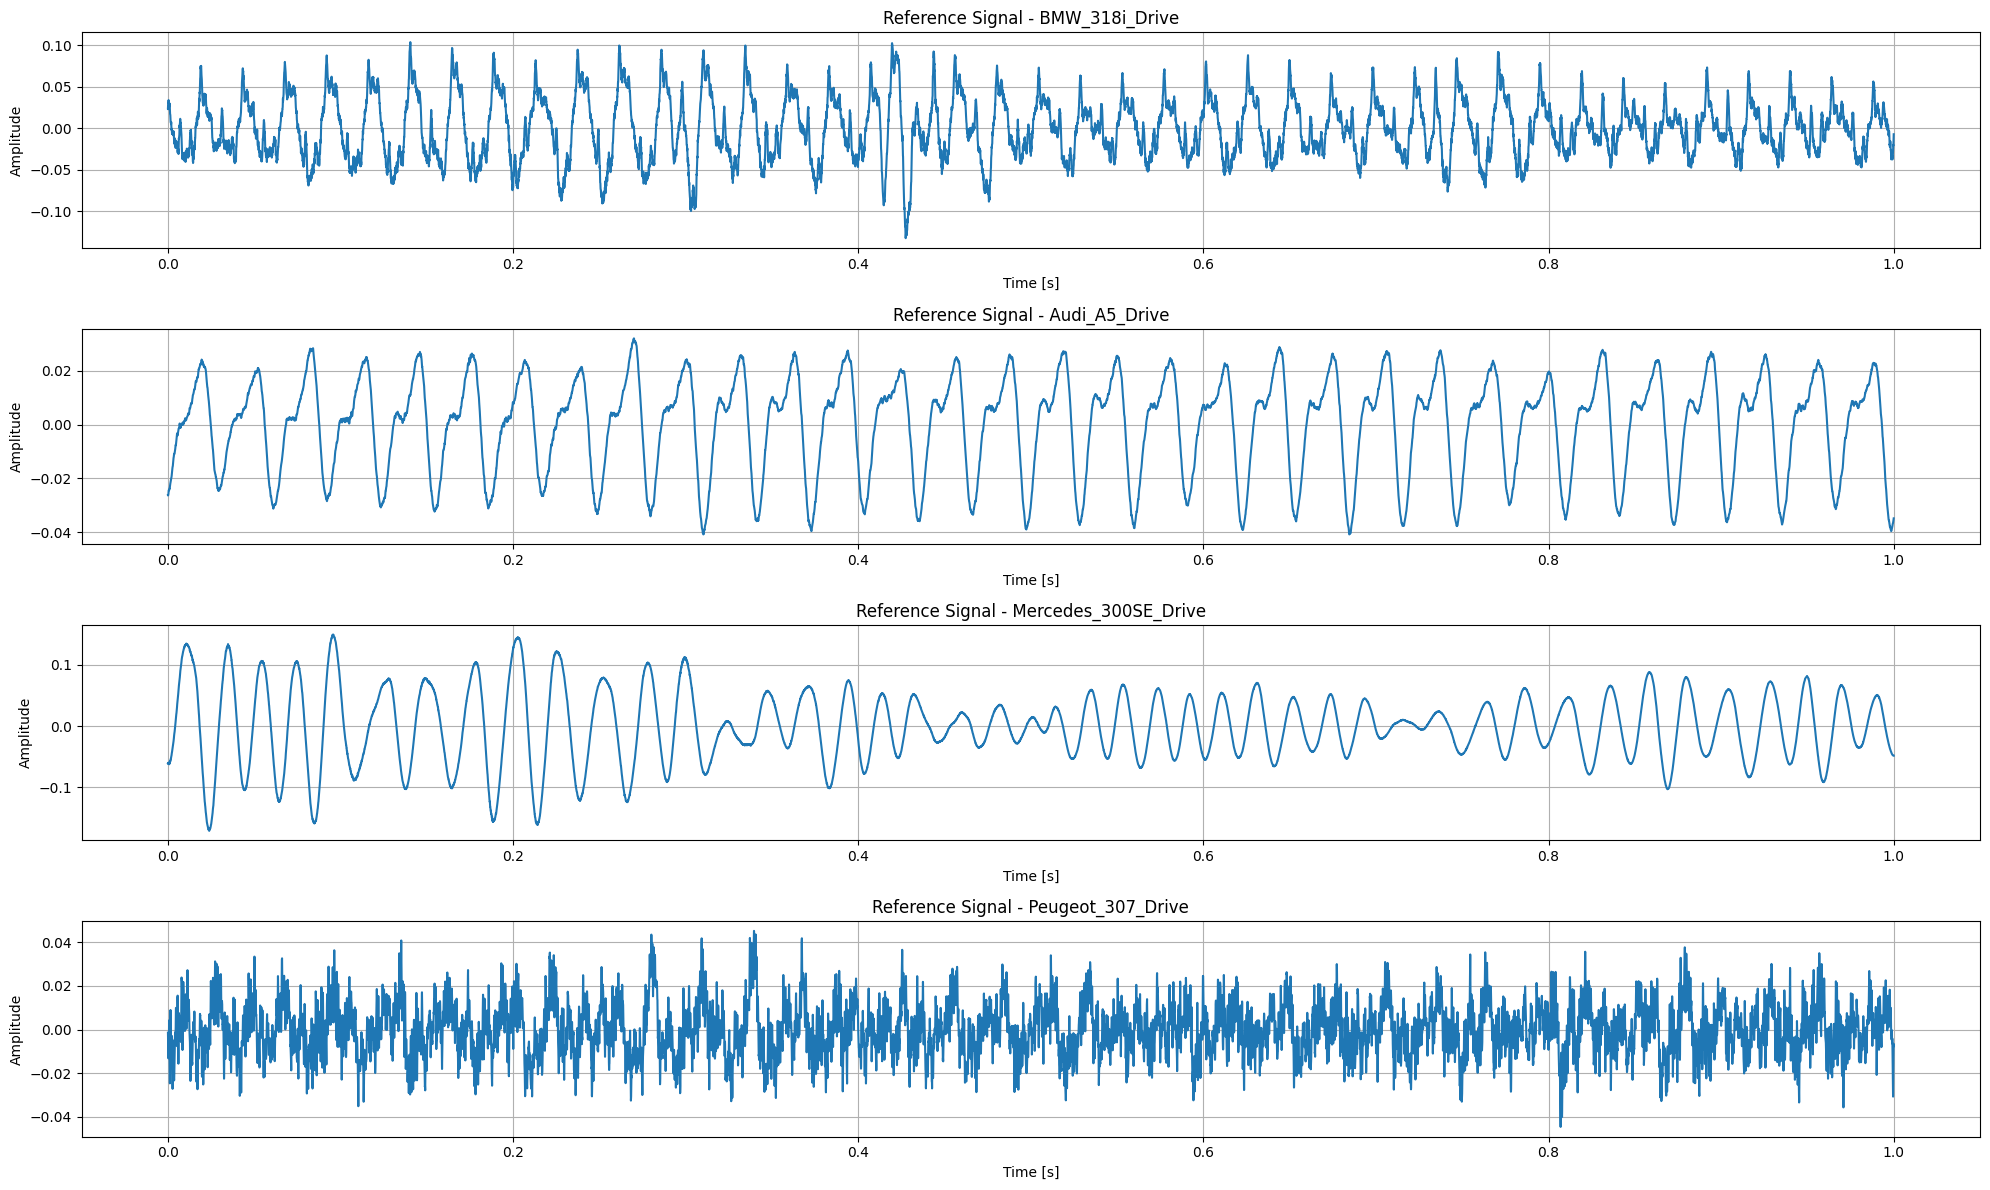

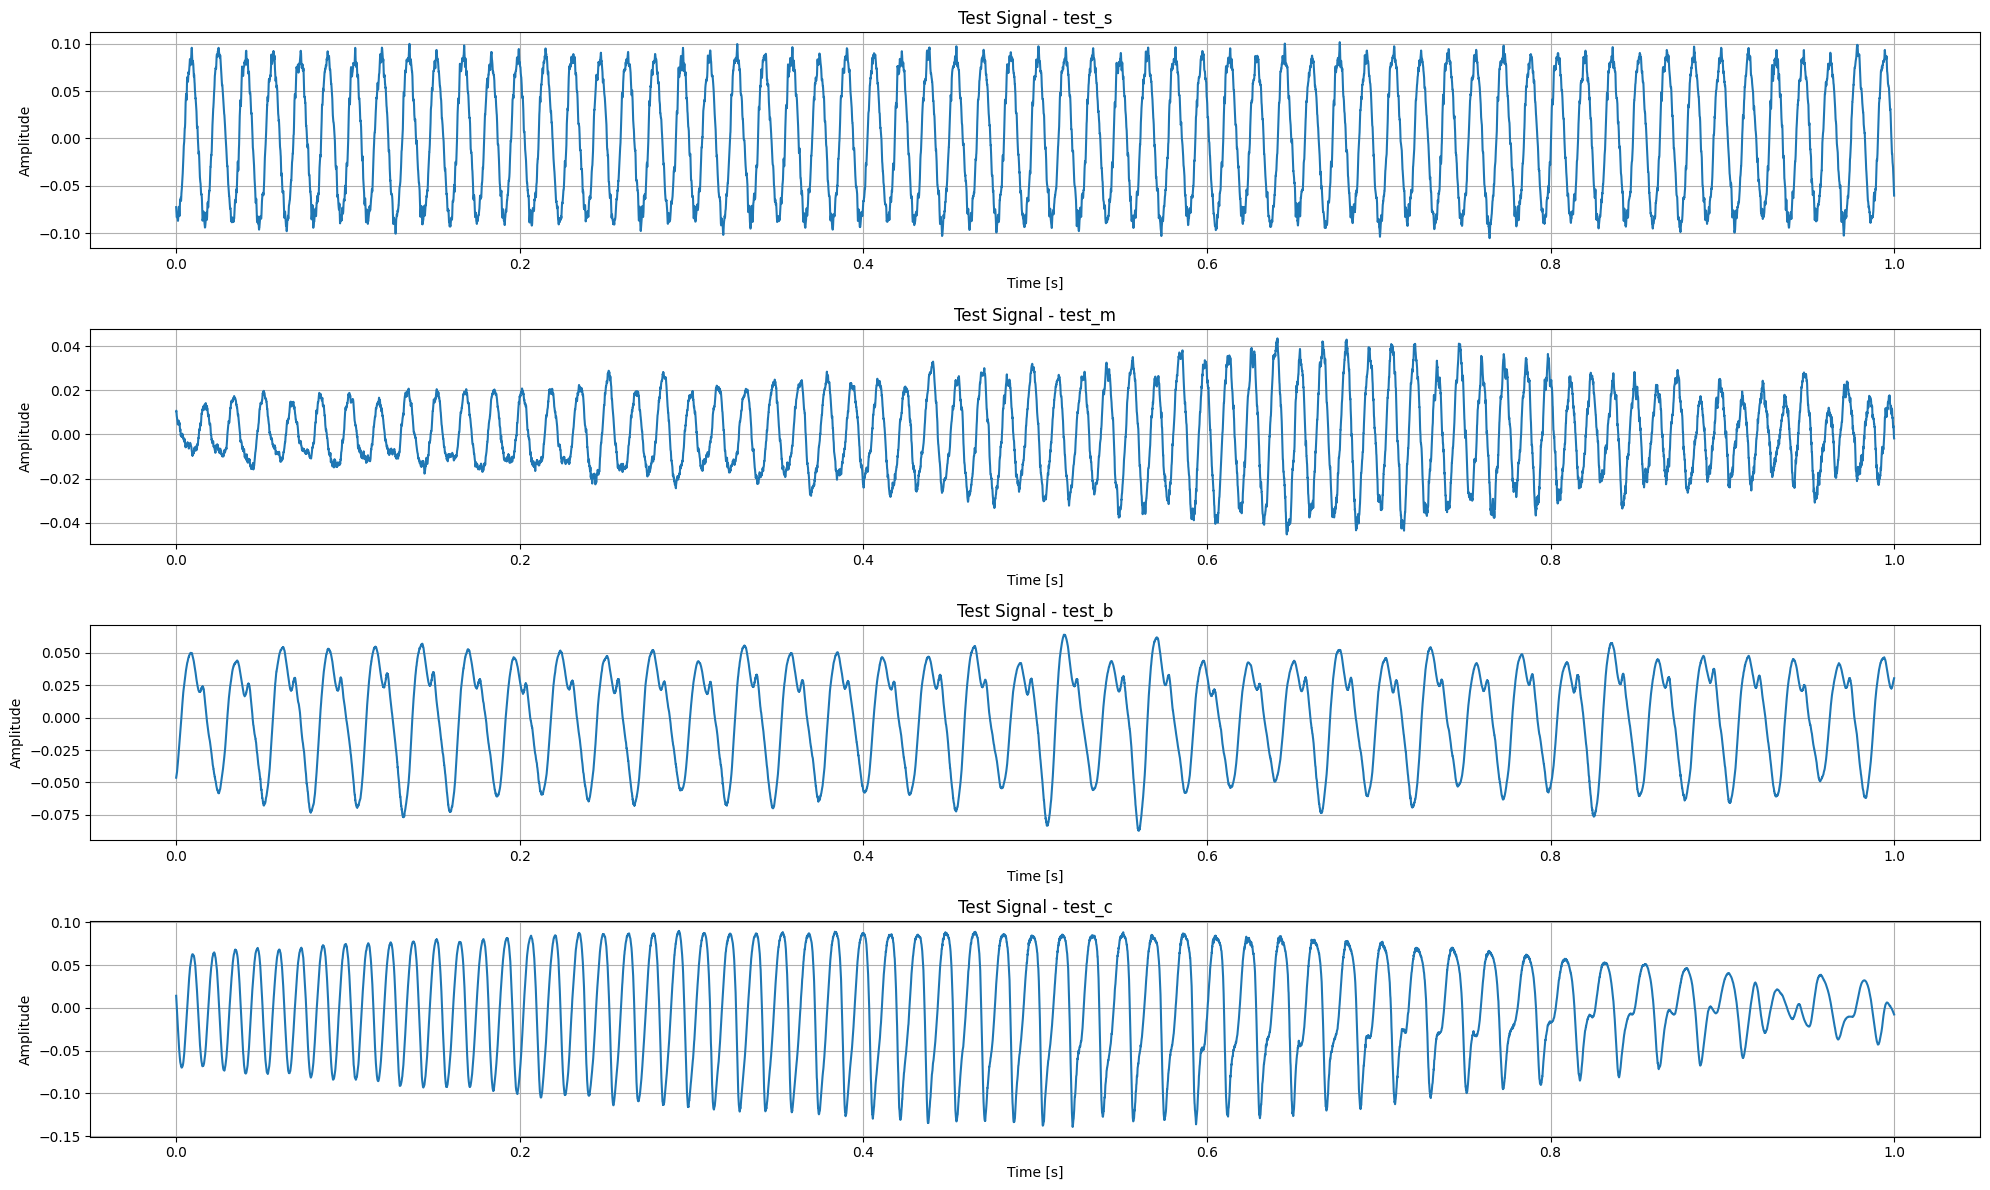

In [ ]:
# Vykreslení signálů v časové doméně
def plot_signals_time(signals_list, label_list, sampling_freq, title_prefix_title):
    plt.figure(figsize=(20, 3 * len(signals_list)))
    index = 1
    for signal, label in zip(signals_list, label_list):
        plt.subplot(len(signals_list), 1, index)
        x_time = np.linspace(0, len(signal)/sampling_freq, num=len(signal))
        plt.plot(x_time, signal)
        plt.title(title_prefix_title + " - " + label)
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid()
        index += 1
    plt.tight_layout()
    plt.show()

# Vykreslení signálů v časové doméně pro referenční signály
plot_signals_time(ref_signals, ref_labels, Fs, "Reference Signal")

# Vykreslení signálů v časové doméně pro testovací signály
plot_signals_time(test_signals, test_labels, Fs, "Test Signal")

### 2.2 Spektrogramy
Zkusil jsem také zobrazit spektrogramy jednotlivých signálů. Zkusil jsem nějak analyzovat místa s nejvyšší intenzitou frekvence, s nejnižší intenzitou. Ale upřímně jsem z toho moc nevyčetl.

Spektrogramy mohou ukazovat vzory, které jsou specifické pro jednotlivé motory, například harmonické frekvence nebo šumové složky. I když se základní frekvence mění s otáčkami, rozložení energie ve spektrogramu může zůstat částečně konzistentní. Změny otáček však způsobují posun dominantních frekvencí, což komplikuje analýzu vizuálně.

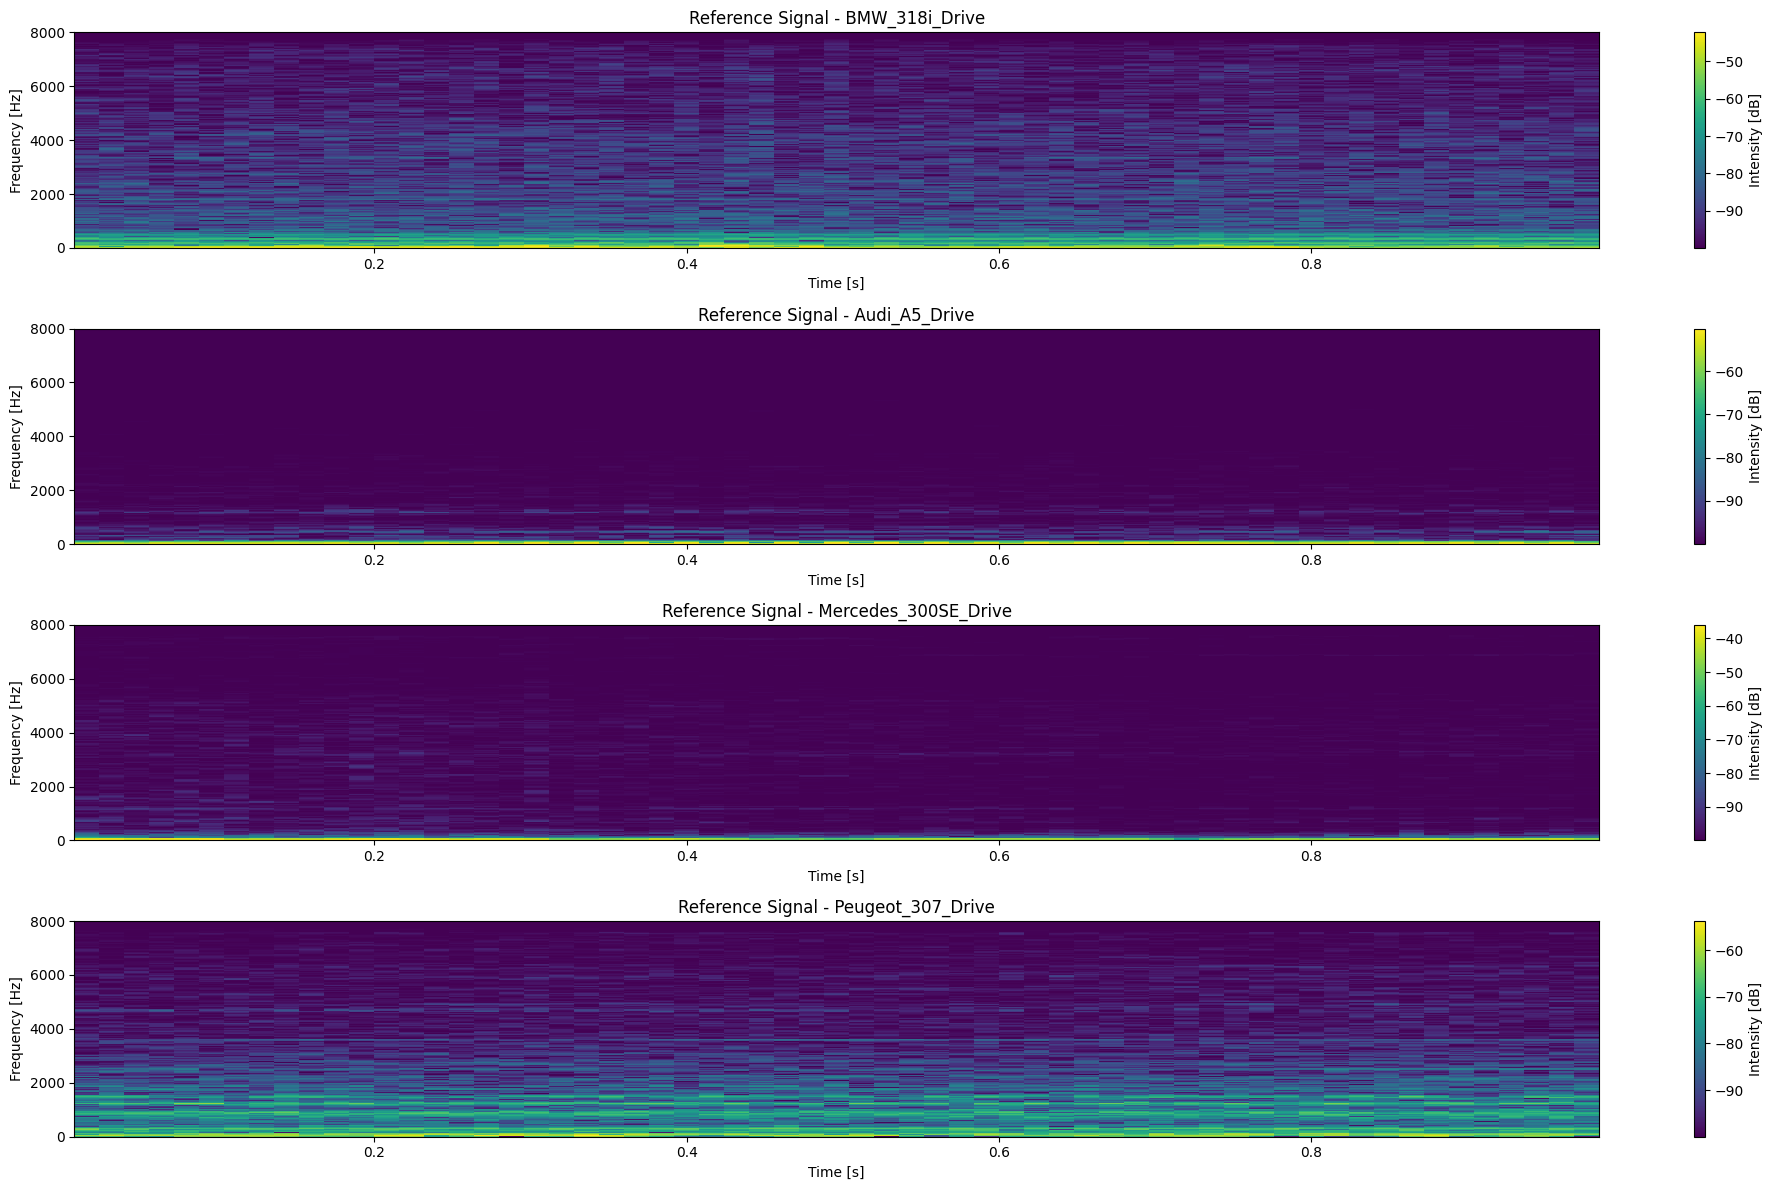

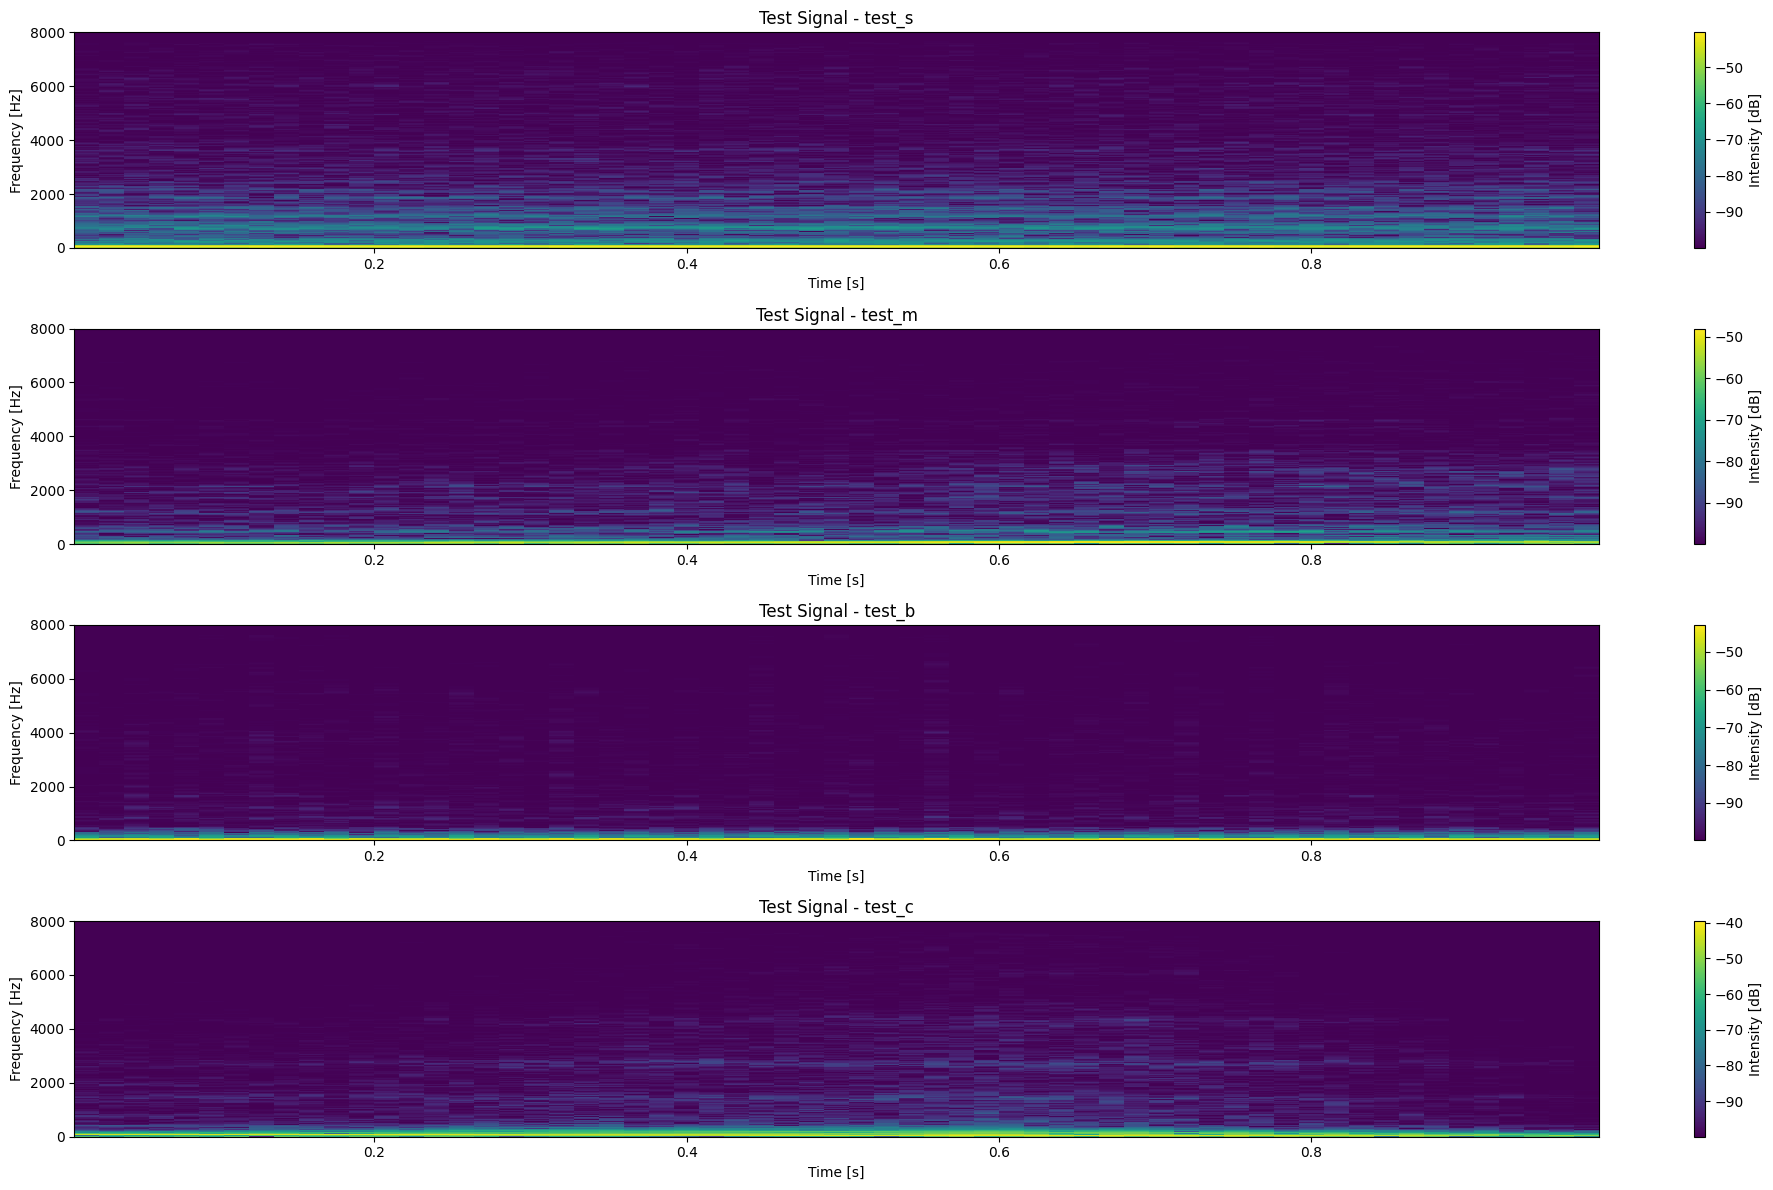

In [ ]:
# Vykreslení spektrogramů
from scipy.signal import spectrogram

def plot_spectrograms(signals, labels, Fs, title_prefix):
    plt.figure(figsize=(20, 3 * len(signals)))
    for i, (signal, label) in enumerate(zip(signals, labels)):
        plt.subplot(len(signals), 1, i+1)
        f, t, Sxx = spectrogram(signal, Fs, window='hann', nperseg=512, noverlap=256)
        plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='auto')
        # Title, popis os
        plt.title(f"{title_prefix} - {label}")
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [s]')
        plt.colorbar(label='Intensity [dB]')
        plt.ylim([0, Fs/2])
    plt.tight_layout()
    plt.show()

# Vykreslení spektrogramů pro referenční signály
plot_spectrograms(ref_signals, ref_labels, Fs, "Reference Signal")

# Vykreslení spektrogramů pro testovací signály
plot_spectrograms(test_signals, test_labels, Fs, "Test Signal")

### 2.3 Vizualizace Frekvenčích Spekter
Zkoušel jsem si vykreslit frekvenční spektra, jestli je možné identifikovat nějaké charakteristické frekvence motoru. Ale všiml jsem si, že otáčky motoru mohou způsobit, že se spektra překrývají, je těžké udělat závěr pouze z grafů, proto jsem se v dalším segmentu vrhl na počítání vzdáleností.

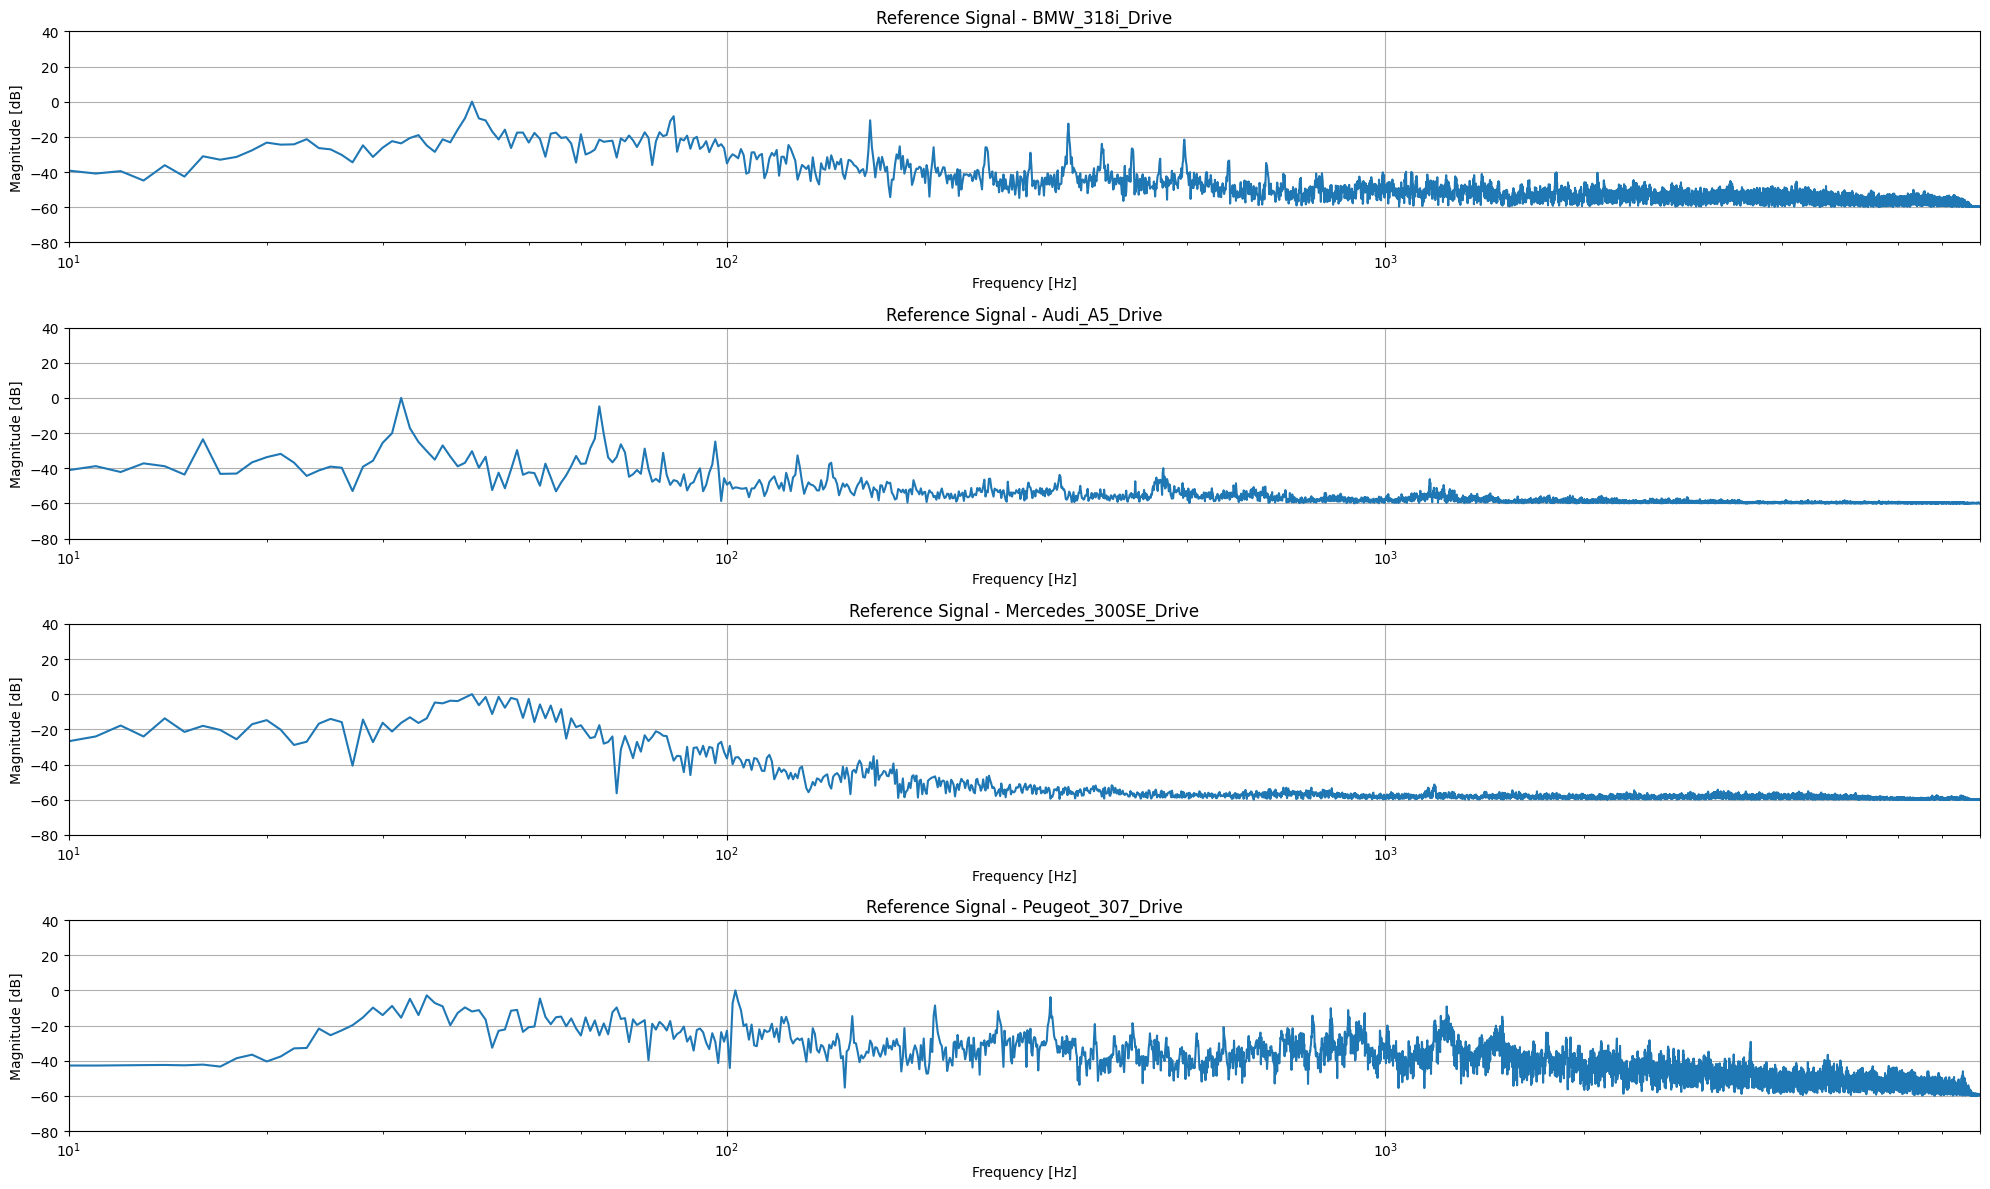

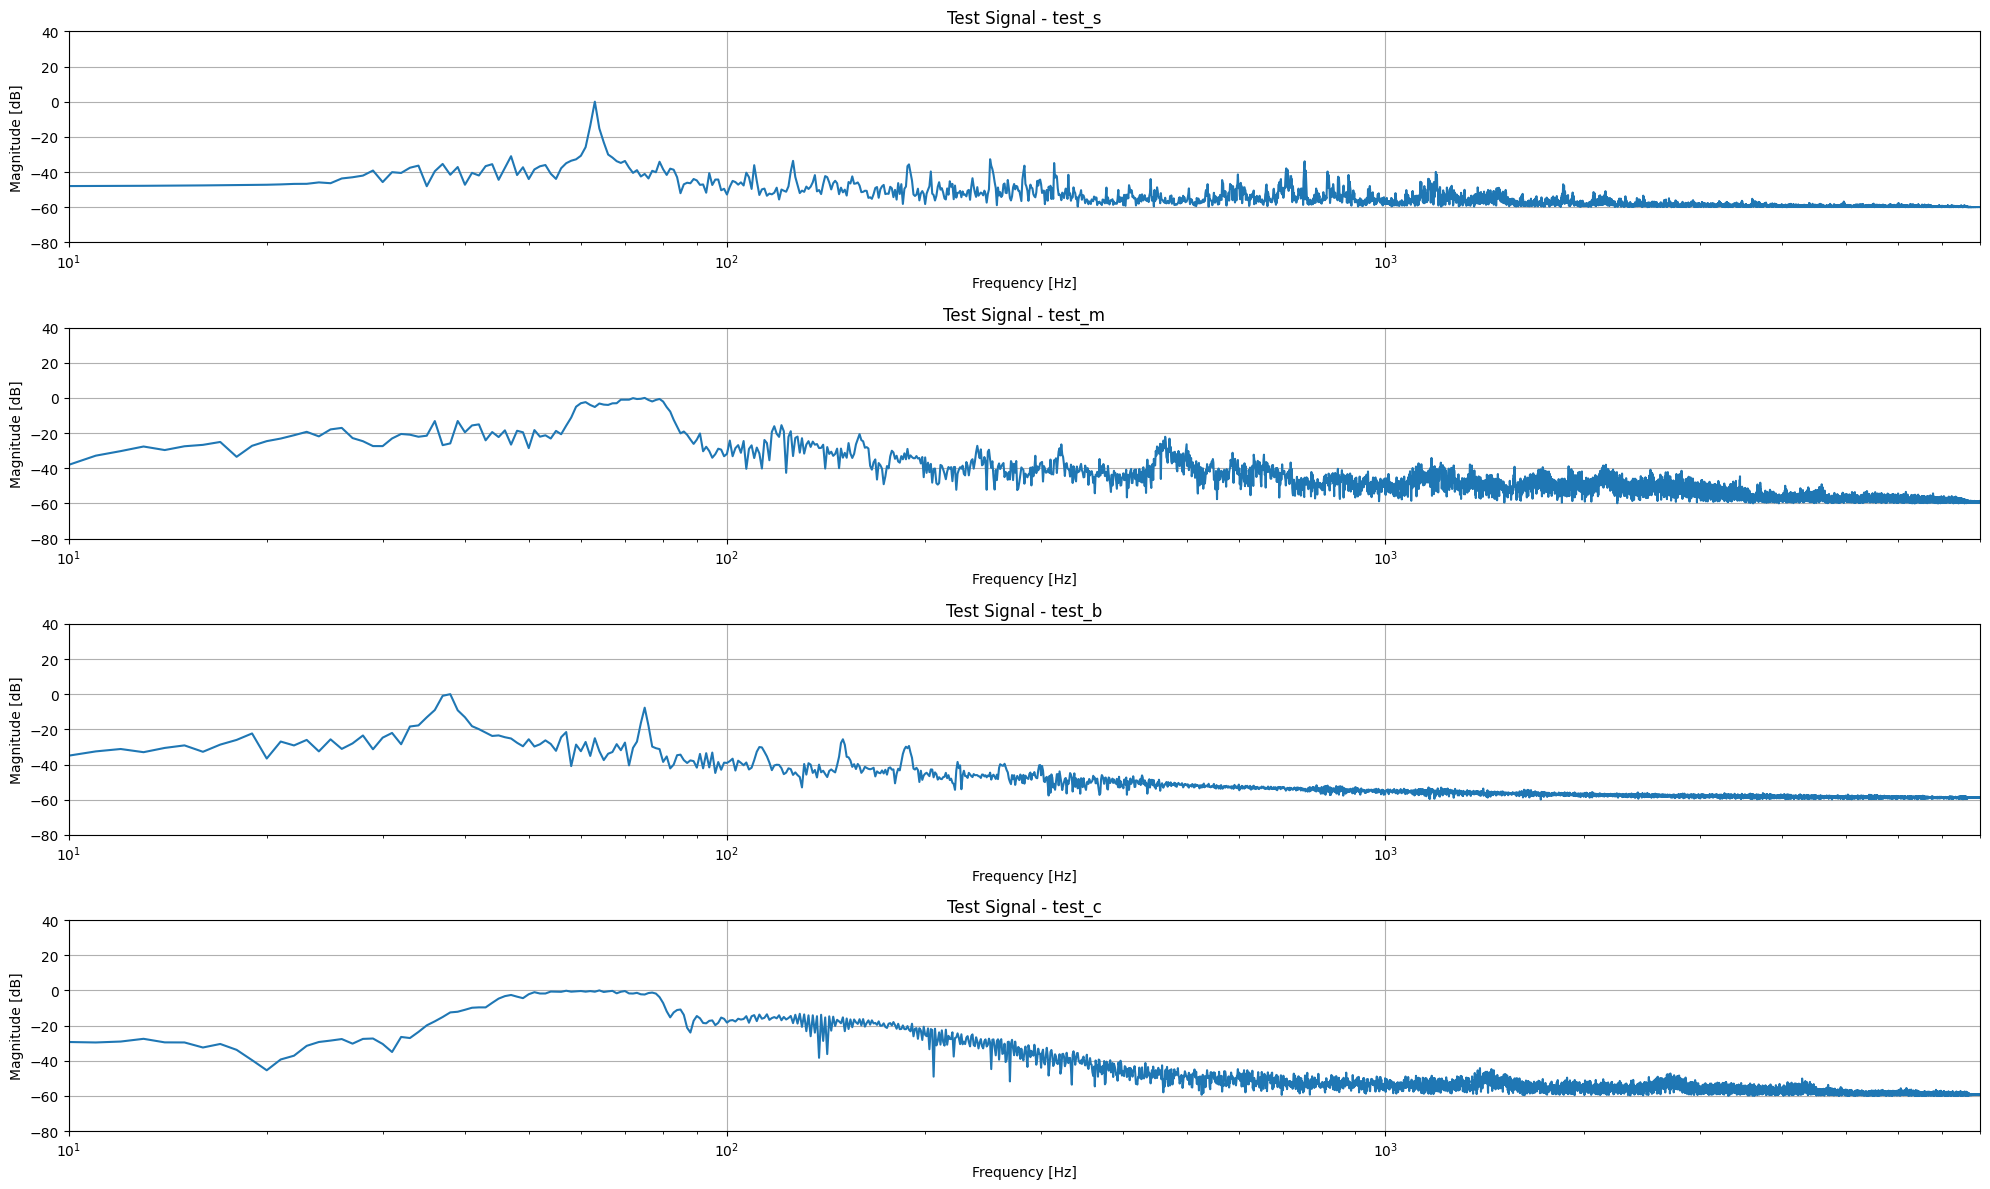

In [ ]:
# Upravený výpočet spektra
def plot_frequency_domain(signals, labels, Fs, title_prefix, log_scale=False, normalize=False, epsilon=1e-3):
    plt.figure(figsize=(20, 3 * len(signals)))
    for i, (signal, label) in enumerate(zip(signals, labels)):
        N = len(signal)
        freq_axis = np.fft.rfftfreq(N, d=1/Fs)
        fft_values = np.abs(np.fft.rfft(signal))

        # Normalizac
        if normalize:
            fft_values = fft_values / np.max(fft_values)

        # Převod na decibely s vyšším epsilonem
        fft_values_db = 20 * np.log10(fft_values + epsilon)  # Zvýšení epsilonu

        plt.subplot(len(signals), 1, i+1)
        if log_scale:
            plt.plot(freq_axis, fft_values_db)
        else:
            plt.plot(freq_axis, fft_values)

        plt.title(f"{title_prefix} - {label}")
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Magnitude [dB]" if log_scale else "Magnitude")
        plt.grid(True)

        # Logaritmická osa x
        if log_scale:
            plt.xscale("log")

        # Omezení os
        plt.xlim([10, Fs/2])  # Dolní limit 10 Hz (kvůli šumu)
        if log_scale:
            plt.ylim([-80, 40])  # Dolní hranice
    plt.tight_layout()
    plt.show()

plot_frequency_domain(ref_signals, ref_labels, Fs, "Reference Signal", log_scale=True, normalize=True, epsilon=1e-3)

plot_frequency_domain(test_signals, test_labels, Fs, "Test Signal", log_scale=True, normalize=True, epsilon=1e-3)




---


# 3. Zkoušení různých metod


---


## 3.1 Euklidovská a Kosínová vzdálenost
Při výpočtu vzdáleností mezi testovacími a referenčními signály jsem použil Kosinovou a Euklidovskou vzdálenost. Při porovnávájí signálů jsem použil MFCC, které zachycují spektrální vlastnosti a změny frekvenčního obsahu v čase.

Zajímavé je, že výsledky s Kosinovou vzdáleností se podobaly mým vlastním hodnocením při poslechu a analýze signálů v časové ose. Euklidovská vzdálenost také poskytla zajímavé výsledky, ale na mě působila méně přesně, co se týče odhadu podobnosti signálů.

Přiřazení na základě těchto vzdáleností ale asi není dobrý nápad, jelikož tyto metody nezohledňují změny frekvencí způsobené otáčkami motoru, také nejsou dostatečně dobré na změny v harmonických složkách.

Odkazy:
- MFCC: https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
- Cosine: https://en.wikipedia.org/wiki/Cosine_similarity
- Euclidan: https://en.wikipedia.org/wiki/Euclidean_distance
      

In [ ]:
import librosa
from scipy.spatial.distance import cosine, euclidean

# Funkce pro extrakci vlastností ze signálu
def extract_features(signal, Fs):
    features = {}

    # Výpočet MFCC (Mel-Frequency Cepstral Coefficients)
    mfccs = librosa.feature.mfcc(y=signal, sr=Fs, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Výpočet spektrálního centroidu
    spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=Fs)
    spectral_centroid_mean = np.mean(spectral_centroids)

    # Výpočet spektrálního roll-off
    spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=Fs)
    spectral_rolloff_mean = np.mean(spectral_rolloff)

    # Výpočet míry průsečíků nul
    zero_crossing_rate = librosa.feature.zero_crossing_rate(signal)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)

    # Výpočet chroma vlastností
    chroma = librosa.feature.chroma_stft(y=signal, sr=Fs)
    chroma_mean = np.mean(chroma, axis=1)

    # Složení všech vlastností do jednoho vektoru
    feature_vector = np.hstack((
        mfccs_mean,
        spectral_centroid_mean,
        spectral_rolloff_mean,
        zero_crossing_rate_mean,
        chroma_mean
    ))

    return feature_vector

# Extrakce vlastností pro referenční signály
ref_features = []
for signal in ref_signals:
    feature_vector = extract_features(signal, Fs)
    ref_features.append(feature_vector)

# Extrakce vlastností pro testovací signály
test_features = []
for signal in test_signals:
    feature_vector = extract_features(signal, Fs)
    test_features.append(feature_vector)

# Inicializace matic vzdáleností
cosine_distances = np.zeros((len(test_features), len(ref_features)))
euclidean_distances = np.zeros((len(test_features), len(ref_features)))

# Výpočet vzdáleností mezi signály
for i, test_feat in enumerate(test_features):
    for j, ref_feat in enumerate(ref_features):
        cosine_distances[i, j] = cosine(test_feat, ref_feat)
        euclidean_distances[i, j] = euclidean(test_feat, ref_feat)

# Příprava názvů štítků pro lepší přehlednost
test_labels_short = [label.replace('test_', '') for label in test_labels]
ref_labels_short = ref_labels

# Přiřazení pomocí kosinové vzdálenosti
assignments_cosine = {}
print("PŘIŘAZENÍ POMOCÍ KOSINOVÉ VZDÁLENOSTI")
for i, test_label in enumerate(test_labels_short):
    min_index = np.argmin(cosine_distances[i])
    assigned_ref = ref_labels_short[min_index]
    min_distance = cosine_distances[i, min_index]
    assignments_cosine[test_label] = (assigned_ref, min_distance)
    print(f"Testovací signál {test_label} je přiřazen k referenčnímu signálu {assigned_ref} s kosinovou vzdáleností {min_distance:.4f}")

# Přiřazení pomocí eukleidovské vzdálenosti
assignments_euclidean = {}
print("\nPŘIŘAZENÍ POMOCÍ EUKLEIDOVSKÉ VZDÁLENOSTI")
for i, test_label in enumerate(test_labels_short):
    min_index = np.argmin(euclidean_distances[i])
    assigned_ref = ref_labels_short[min_index]
    min_distance = euclidean_distances[i, min_index]
    assignments_euclidean[test_label] = (assigned_ref, min_distance)
    print(f"Testovací signál {test_label} je přiřazen k referenčnímu signálu {assigned_ref} s eukleidovskou vzdáleností {min_distance:.4f}")


PŘIŘAZENÍ POMOCÍ KOSINOVÉ VZDÁLENOSTI
Testovací signál s je přiřazen k referenčnímu signálu Peugeot_307_Drive s kosinovou vzdáleností 0.0112
Testovací signál m je přiřazen k referenčnímu signálu Peugeot_307_Drive s kosinovou vzdáleností 0.0154
Testovací signál b je přiřazen k referenčnímu signálu Audi_A5_Drive s kosinovou vzdáleností 0.0059
Testovací signál c je přiřazen k referenčnímu signálu Mercedes_300SE_Drive s kosinovou vzdáleností 0.0069

PŘIŘAZENÍ POMOCÍ EUKLEIDOVSKÉ VZDÁLENOSTI
Testovací signál s je přiřazen k referenčnímu signálu Audi_A5_Drive s eukleidovskou vzdáleností 910.8693
Testovací signál m je přiřazen k referenčnímu signálu Peugeot_307_Drive s eukleidovskou vzdáleností 995.5540
Testovací signál b je přiřazen k referenčnímu signálu Mercedes_300SE_Drive s eukleidovskou vzdáleností 113.2076
Testovací signál c je přiřazen k referenčnímu signálu Mercedes_300SE_Drive s eukleidovskou vzdáleností 79.5723


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


## 3.2 Dynamic Time Warping

Upřímně jsem si nevěděl rady, a tak jsem zoufale použil metodu DTW (Dynamic Time Warping). Výsledky byly v souladu s mými předpoklady z poslechu a vizualizace. Hlavní problém je změna frekvencí motorů při různých otáčkách, což DTW neřeší efektivně. DTW je užitečné pro porovnávání signálů s odlišným časovým zarovnáním, takže DTW je tady méně relevantní.

Odkazy:
- DTW: https://en.wikipedia.org/wiki/Dynamic_time_warping
- Librosa: https://librosa.org/doc/main/generated/librosa.sequence.dtw.html


In [ ]:
# Funkce pro extrakci MFCC sekvencí ze signálu
def extract_mfcc_sequence(signal, Fs, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=signal, sr=Fs, n_mfcc=n_mfcc)
    return mfccs

# Extrakce MFCC sekvencí pro všechny signály
ref_mfcc_sequences = [extract_mfcc_sequence(signal, Fs) for signal in ref_signals]
test_mfcc_sequences = [extract_mfcc_sequence(signal, Fs) for signal in test_signals]

import librosa.display
from scipy.spatial.distance import cdist

# Inicializace matice DTW vzdáleností
dtw_distances = np.zeros((len(test_mfcc_sequences), len(ref_mfcc_sequences)))

for i, test_mfcc in enumerate(test_mfcc_sequences):
    for j, ref_mfcc in enumerate(ref_mfcc_sequences):
        # Výpočet DTW vzdálenosti mezi testovacím a referenčním signálem
        distance, _ = librosa.sequence.dtw(X=test_mfcc.T, Y=ref_mfcc.T, metric='euclidean')
        dtw_distances[i, j] = distance[-1, -1]

# Přiřazení pomocí DTW vzdálenosti
assignments_dtw = {}
for i, test_label in enumerate(test_labels_short):
    min_index = np.argmin(dtw_distances[i])
    assigned_ref = ref_labels_short[min_index]
    min_distance = dtw_distances[i, min_index]
    assignments_dtw[test_label] = (assigned_ref, min_distance)
    print(f"Testovací signál {test_label} je přiřazen k referenčnímu signálu {assigned_ref} s DTW vzdáleností {min_distance:.2f}")


Testovací signál s je přiřazen k referenčnímu signálu Peugeot_307_Drive s DTW vzdáleností 894.52
Testovací signál m je přiřazen k referenčnímu signálu Audi_A5_Drive s DTW vzdáleností 1197.51
Testovací signál b je přiřazen k referenčnímu signálu Mercedes_300SE_Drive s DTW vzdáleností 972.43
Testovací signál c je přiřazen k referenčnímu signálu Mercedes_300SE_Drive s DTW vzdáleností 1608.69


### 3.3 Největší amplituda

Výsledky byly ale stále nekonsistentní, proto jsem zkusil jiný přístup. Jelikož jeden z hlavních problémů nahrávek motorů s jinýma otáčkama je to, že se mění frekvence, napadlo mě, že kdybych našel největší amplitudu pro každý signál a následně bych signály přiřadil na základě maximální amplitudy, možná bych se dopracoval k požadovaným výsledkům.

Sice výsledky jsou zase úplně jiné, ale konečně bylo přiřazeno BMW k test_b, což si myslím, že je správně. Tento přístup ale má své limity, protože kdyby jsme testovali signály s různými harmonickými složkami, ale stejnou maximální amplitudou, výsledky by byly zavádějící.

Odkazy:
- Python fft:https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

In [ ]:
import numpy as np

# Najde frekvenci s největší amplitudou pro signál
def find_peak_frequency_amplitude(signal, Fs):
    N = len(signal)
    freqs = np.fft.rfftfreq(N, 1 / Fs)  # Vygeneruje kladné frekvence
    spectrum = np.abs(np.fft.rfft(signal))  # Spektrum (kladné složky)

    # Najdi index a hodnotu s maximální amplitudou
    peak_idx = np.argmax(spectrum)
    peak_amplitude = spectrum[peak_idx]
    peak_frequency = freqs[peak_idx]

    return peak_frequency, peak_amplitude

# Přiřadí testované signály k referenčním na základě maximální amplitudy
def match_signals_by_peak(test_signals, ref_signals, Fs, test_labels, ref_labels, tolerance=150):
    # Výpočet dominantních amplitud pro referenční signály
    ref_peak_data = {}
    for label, signal in zip(ref_labels, ref_signals):
        _, amplitude = find_peak_frequency_amplitude(signal, Fs)
        ref_peak_data[label] = amplitude
        print(f"Reference Signal '{label}': Peak Amplitude = {amplitude:.2f}")

    print("\n")

    # Přiřazení testovaných signálů
    assignments = {}
    for label, signal in zip(test_labels, test_signals):
        _, test_amplitude = find_peak_frequency_amplitude(signal, Fs)
        print(f"Test Signal '{label}': Peak Amplitude = {test_amplitude:.2f}")

        # Nejbližší referenční signál
        closest_label = None
        min_difference = float("inf")
        for ref_label, ref_amplitude in ref_peak_data.items():
            difference = abs(test_amplitude - ref_amplitude)
            if difference < min_difference:
                min_difference = difference
                closest_label = ref_label

        # Rozhodnutí na základě tolerance
        if min_difference <= tolerance:
            assignments[label] = closest_label
        else:
            assignments[label] = "\"Nepatří k žádnému z referenčních aut\""

    return assignments

assignments = match_signals_by_peak(test_signals, ref_signals, Fs, test_labels, ref_labels)
print("\n" + "-" * 50 + "\n")
# Zlepšení formátování výstupu
for test_label, assigned_ref in assignments.items():
    print(f"Testovací signál {test_label} je přiřazen k referenčnímu signálu {assigned_ref}")



Reference Signal 'BMW_318i_Drive': Peak Amplitude = 271.82
Reference Signal 'Audi_A5_Drive': Peak Amplitude = 173.24
Reference Signal 'Mercedes_300SE_Drive': Peak Amplitude = 229.17
Reference Signal 'Peugeot_307_Drive': Peak Amplitude = 47.27


Test Signal 'test_s': Peak Amplitude = 675.29
Test Signal 'test_m': Peak Amplitude = 51.87
Test Signal 'test_b': Peak Amplitude = 267.12
Test Signal 'test_c': Peak Amplitude = 126.71

--------------------------------------------------

Testovací signál test_s je přiřazen k referenčnímu signálu "Nepatří k žádnému z referenčních aut"
Testovací signál test_m je přiřazen k referenčnímu signálu Peugeot_307_Drive
Testovací signál test_b je přiřazen k referenčnímu signálu BMW_318i_Drive
Testovací signál test_c je přiřazen k referenčnímu signálu Audi_A5_Drive


### 3.4 Porovnání signálů pomocí amplitudové obálky:
Jako poslední věc, co jsem zkusil je porovnání amplitudových obálek signálů a podle korelačního koeficientu je signály přiřadit k sobě.

Porovnání funguje tak, že pro každý testovací signál je pomocí Hilbertovy transformace spočítána amplitudová obálka, která se následně koreluje s obálkami všech referenčních signálů, a signál s nejvyšším korelačním koeficientem je označen jako nejlepší shoda.

Výsledky jsou docela uspokojivé a jsou skoro stejné k jak u jiných metod.

Odkazy:
- Hilbert: https://en.wikipedia.org/wiki/Hilbert_transform

In [ ]:
import numpy as np
from scipy.signal import hilbert

# Funkce pro výpočet amplitudové obálky signálu
def compute_signal_envelope(signal):
    # Aplikace Hilbertovy transformace pro získání analytického signálu
    analytic_sig = hilbert(signal)
    # Vypočítání amplitudové obálky jako absolutní hodnota analytického signálu
    amplitude_env = np.abs(analytic_sig)
    return amplitude_env

# Funkce pro porovnání amplitudových obálek testovacích a referenčních signálů
def compare_envelope_signals(tests, references, test_labels_list, ref_labels_list):
    for test_idx in range(len(tests)):
        test_signal = tests[test_idx]
        # Vypočítání amplitudové obálky testovacího signálu
        envelope_test = compute_signal_envelope(test_signal)

        highest_corr = -1
        best_match_label = ""


        for ref_idx in range(len(references)):
            ref_signal = references[ref_idx]
            # Vypočítání amplitudové obálky referenčního signálu
            envelope_ref = compute_signal_envelope(ref_signal)

            # Zajištění stejné délky signálů pro korelaci
            if len(envelope_test) < len(envelope_ref):
                min_length = len(envelope_test)
            else:
                min_length = len(envelope_ref)

            # Oříznutí signálů na stejnou délku
            trimmed_test_env = envelope_test[:min_length]
            trimmed_ref_env = envelope_ref[:min_length]

            # Výpočet korelačního koeficientu mezi obálkami testovacího a referenčního signálu
            corr_matrix = np.corrcoef(trimmed_test_env, trimmed_ref_env)
            corr_val = corr_matrix[0][1]  # Korelační koeficient je v pozici [0][1]

            # aktualizace  nejlepší shody
            if corr_val > highest_corr:
                highest_corr = corr_val
                best_match_label = ref_labels_list[ref_idx]

        print("Testovací signál " + test_labels_list[test_idx] + " je přiřazen k referenčnímu signálu " + best_match_label + " s korelačním koeficientem " + str(round(highest_corr,4)))

compare_envelope_signals(test_signals, ref_signals, test_labels, ref_labels)

Testovací signál test_s je přiřazen k referenčnímu signálu Peugeot_307_Drive s korelačním koeficientem -0.0255
Testovací signál test_m je přiřazen k referenčnímu signálu Audi_A5_Drive s korelačním koeficientem 0.1047
Testovací signál test_b je přiřazen k referenčnímu signálu Mercedes_300SE_Drive s korelačním koeficientem 0.0064
Testovací signál test_c je přiřazen k referenčnímu signálu BMW_318i_Drive s korelačním koeficientem 0.2903




---


# 4. Finální rozřazení a závěr


---


Jelikož nevím, která z metod je nejpřesnější, rozhodl jsem sečíst všechny výsledky a následně přiřadit signály podle největšího počtu výskytu:


- test_s -> Peugeot_307_Drive
- test_b -> BMW_318i_Drive
- test_c -> Mercedes_300SE_Drive
- test_m -> Audi_A5_Drive

## Závěr
Zdá se, že neexistuje nějaká univerzální metoda na porovnávání těchto konktrétních signálů. Každá metoda má své vlastní výhody a omezení. Možná s rozrůstající umělou inteligencí a strojovým učením bychom za nějakou dobu mohli přijít k přesnějším výsledkům.